In [104]:
import tensorcircuit as tc
import tensorflow as ts 
import numpy as np
import math
from numpy import linalg as LA
from matplotlib import pyplot as plt
K = tc.set_backend("tensorflow")

sim_t = 10*math.pi
interval = 100
dt = sim_t / interval
cur_t = 0 
h_m = 0.5

qubit = 5
min_w = 999
w=0
v=0
I = tc.gates._i_matrix
X = tc.gates._x_matrix  
Y = tc.gates._y_matrix  
Z = tc.gates._z_matrix

zt=[0 for i in range(10000)]
zp=[0 for i in range(10000)]
time=[0 for i in range(10000)]

In [105]:
def i_iterate_multiplication(u):
    tmp = 1
    for i in range(u):
        tmp = np.kron(I, tmp)
    return tmp

def zzi(i):
     return np.kron(np.kron(i_iterate_multiplication(i), np.kron(Z, Z)), i_iterate_multiplication(qubit-2-i))
    
def xi(i):
    return np.kron(np.kron(i_iterate_multiplication(i), X), i_iterate_multiplication(qubit-1-i))

h_Z = 0
h_X = 0
for i in range(qubit-1):
    h_Z = h_Z - zzi(i)
for i in range(qubit):
    h_X = h_X + h_m * xi(i)
def evolution(h, t):
    return tc.gates.exponential_gate(h, t)

In [106]:
#w, v = LA.eig(H)
#for i in range(0, len(w)):
#        if w[i] < min_w:
#            min_w = w[i]

c_precise=tc.Circuit(qubit)
c_trotter=tc.Circuit(qubit)
cnt=0;

for _interval in range(interval):
    c_trotter.any(*range(qubit), unitary=evolution(h_X, dt))
    c_trotter.any(*range(qubit), unitary=evolution(h_Z, dt))
    cur_t += dt
    c_precise.any(*range(qubit), unitary=evolution(h_X+h_Z, dt))
    for j in range(qubit):
        zt[cnt]+=c_trotter.expectation([tc.gates.z(), [j]])
    for j in range(qubit):
        zp[cnt]+=c_precise.expectation([tc.gates.z(), [j]])
    time[cnt]=cur_t
    cnt+=1

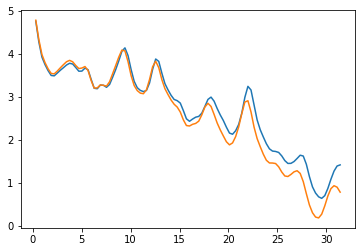

In [107]:
plt.plot([time[i] for i in range(interval)], [zt[i] for i in range(interval)])
plt.plot([time[i] for i in range(interval)], [zp[i] for i in range(interval)])
plt.show()
